### Exercício 1: Implementação do Average Linkage

Complete a implementação da nossa classe `HierarchicalClustering` adicionando o método **Average Linkage**. Em seguida, teste todos os três métodos de ligação (single, complete, average) no dataset simples (`X_simple`) e compare os resultados.

In [3]:
# Célula de importação de bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import seaborn as sns

# Estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [4]:
class HierarchicalClustering:
    def __init__(self, linkage='single'):
        """
        Inicializa o algoritmo de clusterização hierárquica.

        Parameters:
        linkage: str, critério de ligação ('single', 'complete', 'average')
        """
        self.linkage = linkage
        self.merge_history = []
        self.distances = []

    def _calculate_distance_matrix(self, X):
        """
        Calcula a matriz de distâncias entre todos os pares de pontos.
        """
        n = len(X)
        dist_matrix = np.zeros((n, n))

        for i in range(n):
            for j in range(i+1, n):
                dist = np.linalg.norm(X[i] - X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist

        return dist_matrix

    def _cluster_distance(self, cluster1, cluster2, X, dist_matrix):
        """
        Calcula a distância entre dois clusters baseado no critério de ligação.
        """
        if self.linkage == 'single':
            # Distância mínima entre qualquer par de pontos dos clusters
            min_dist = float('inf')
            for i in cluster1:
                for j in cluster2:
                    if dist_matrix[i, j] < min_dist:
                        min_dist = dist_matrix[i, j]
            return min_dist

        elif self.linkage == 'complete':
            # Distância máxima entre qualquer par de pontos dos clusters
            max_dist = 0
            for i in cluster1:
                for j in cluster2:
                    if dist_matrix[i, j] > max_dist:
                        max_dist = dist_matrix[i, j]
            return max_dist

        elif self.linkage == 'average':
            # Distância média entre todos os pares de pontos dos clusters
            dists = []
            for i in cluster1:
                for j in cluster2:
                    dists.append(dist_matrix[i, j])
            return np.mean(dists)


    def fit(self, X):
        """
        Executa o algoritmo de clusterização hierárquica aglomerativa.
        """
        n = len(X)

        # Inicializar cada ponto como um cluster
        clusters = [[i] for i in range(n)]

        # Calcular matriz de distâncias inicial
        dist_matrix = self._calculate_distance_matrix(X)

        self.merge_history = []
        self.distances = []

        step = 0
        print(f"Passo inicial: {len(clusters)} clusters individuais")
        print(f"Clusters: {clusters}\n")

        # Continuar até que reste apenas um cluster
        while len(clusters) > 1:
            # Encontrar o par de clusters mais próximo
            min_distance = float('inf')
            merge_i, merge_j = -1, -1

            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    distance = self._cluster_distance(clusters[i], clusters[j], X, dist_matrix)
                    if distance < min_distance:
                        min_distance = distance
                        merge_i, merge_j = i, j

            # Combinar os clusters mais próximos
            new_cluster = clusters[merge_i] + clusters[merge_j]

            # Salvar informações da fusão
            self.merge_history.append((clusters[merge_i].copy(), clusters[merge_j].copy()))
            self.distances.append(min_distance)

            step += 1
            print(f"Passo {step}: Combinar clusters {clusters[merge_i]} e {clusters[merge_j]}")
            print(f"Distância: {min_distance:.3f}")

            # Remover os clusters antigos e adicionar o novo
            clusters = [clusters[k] for k in range(len(clusters)) if k != merge_i and k != merge_j]
            clusters.append(new_cluster)

            print(f"Clusters restantes: {clusters}\n")

In [5]:
# Exemplo de dataset simples
X_simple = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9,11]
])

# Testando cada linkage
for linkage in ['single', 'complete', 'average']:
    print("="*50)
    print(f"Teste com linkage = {linkage}")
    hc = HierarchicalClustering(linkage=linkage)
    hc.fit(X_simple)


Teste com linkage = single
Passo inicial: 6 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5]]

Passo 1: Combinar clusters [0] e [1]
Distância: 0.539
Clusters restantes: [[2], [3], [4], [5], [0, 1]]

Passo 2: Combinar clusters [4] e [0, 1]
Distância: 1.300
Clusters restantes: [[2], [3], [5], [4, 0, 1]]

Passo 3: Combinar clusters [2] e [3]
Distância: 3.000
Clusters restantes: [[5], [4, 0, 1], [2, 3]]

Passo 4: Combinar clusters [5] e [2, 3]
Distância: 3.162
Clusters restantes: [[4, 0, 1], [5, 2, 3]]

Passo 5: Combinar clusters [4, 0, 1] e [5, 2, 3]
Distância: 7.120
Clusters restantes: [[4, 0, 1, 5, 2, 3]]

Teste com linkage = complete
Passo inicial: 6 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5]]

Passo 1: Combinar clusters [0] e [1]
Distância: 0.539
Clusters restantes: [[2], [3], [4], [5], [0, 1]]

Passo 2: Combinar clusters [4] e [0, 1]
Distância: 1.400
Clusters restantes: [[2], [3], [5], [4, 0, 1]]

Passo 3: Combinar clusters [2] e [3]
Distância: 3.000
Clu

### Exercício 2: Análise do Dataset Wine - Seleção de Features e Comparação de Métodos

Aplique a clusterização hierárquica do SciPy ao dataset Wine. Primeiro, você deve selecionar um bom par de features para visualização bidimensional, depois comparar diferentes métodos de ligação.

**Tarefas:**
1. Carregue o dataset Wine e explore suas features
2. Selecione as duas melhores features para visualização (analise correlações, variâncias, etc.)
3. Aplique os 4 métodos de ligação ('single', 'complete', 'average', 'ward') usando `scipy.cluster.hierarchy.linkage`
4. Crie dendrogramas para cada método
5. Determine visualmente qual método produz a melhor separação

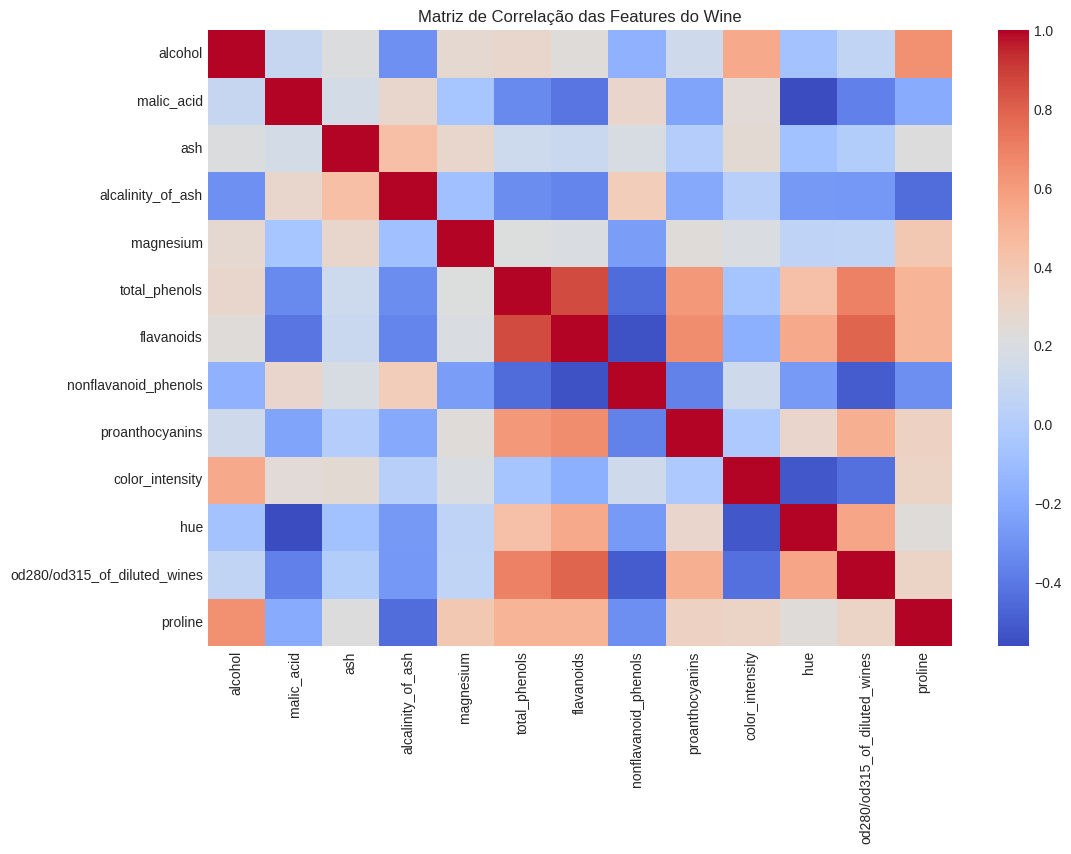

Variâncias das features:
 proline                         99166.717355
magnesium                         203.989335
alcalinity_of_ash                  11.152686
color_intensity                     5.374449
malic_acid                          1.248015
flavanoids                          0.997719
alcohol                             0.659062
od280/od315_of_diluted_wines        0.504086
total_phenols                       0.391690
proanthocyanins                     0.327595
ash                                 0.075265
hue                                 0.052245
nonflavanoid_phenols                0.015489
dtype: float64


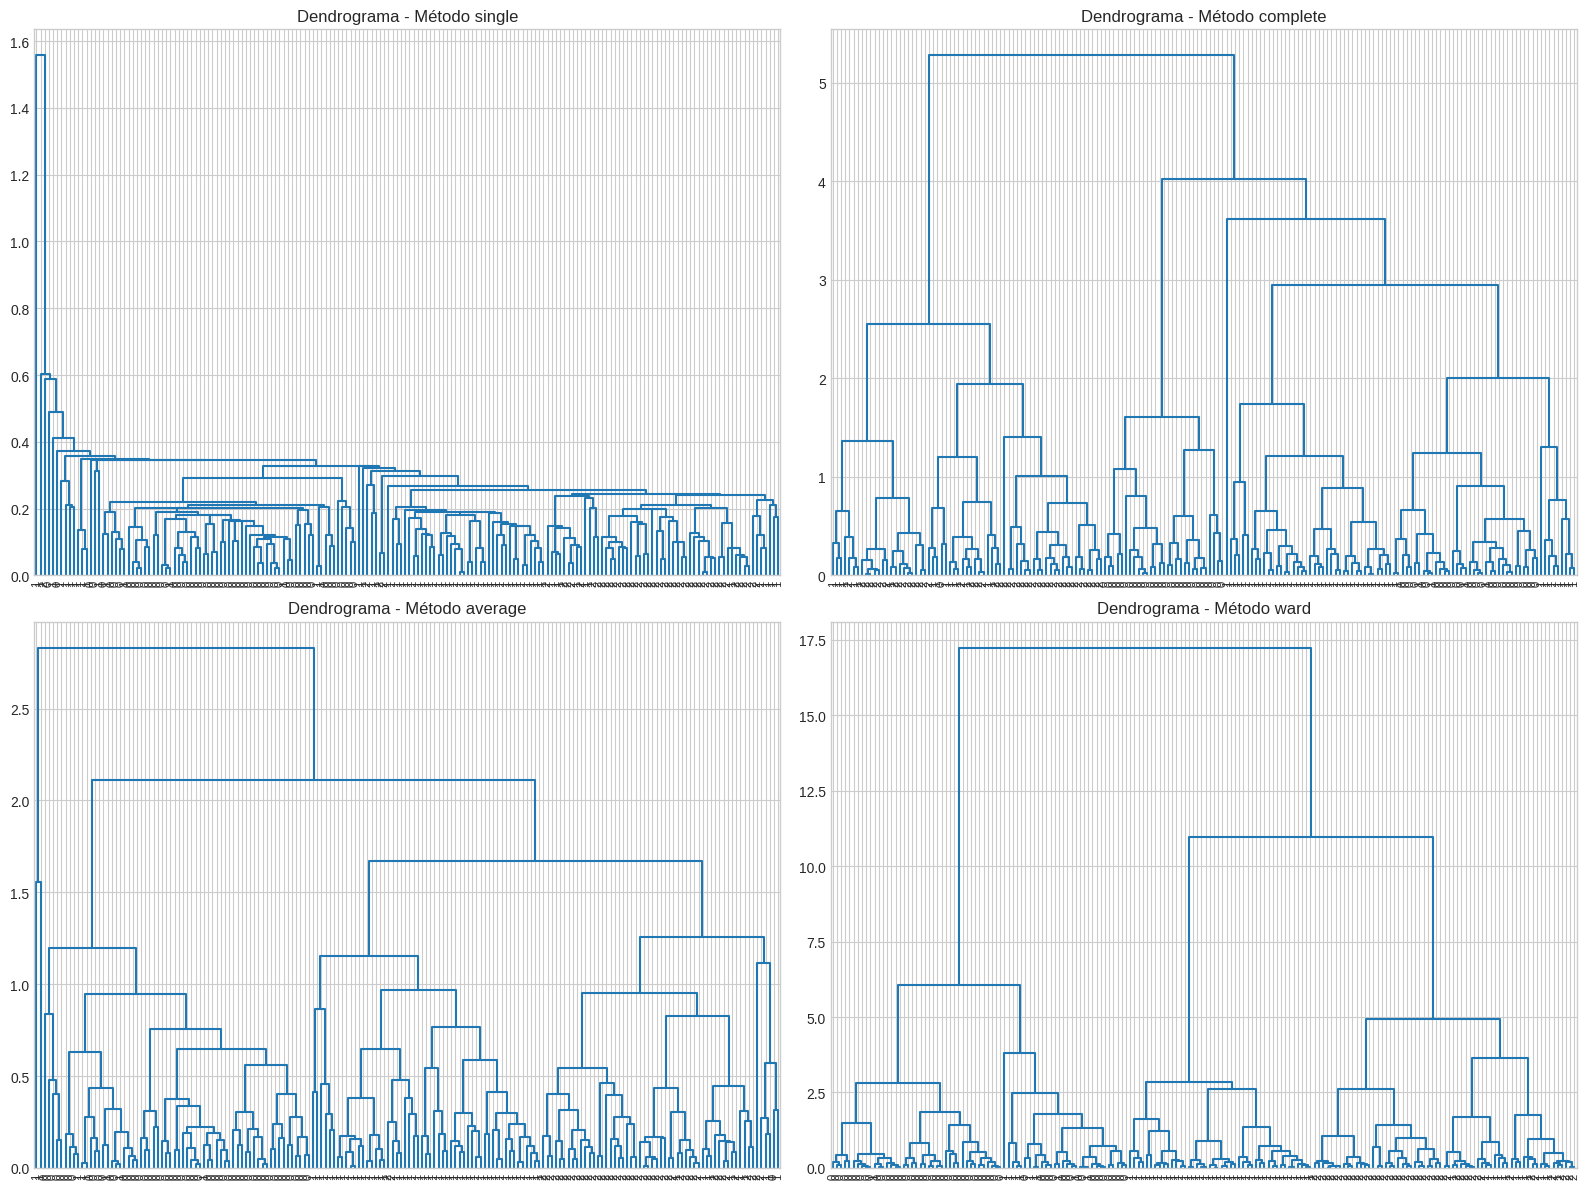

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import linkage, dendrogram

# 1. Carregar o dataset Wine
wine = load_wine()
X = wine.data
y = wine.target
features = wine.feature_names

wine_df = pd.DataFrame(X, columns=features)
wine_df['class'] = y

# 2. Analisar correlações e variâncias
corr_matrix = wine_df.drop('class', axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de Correlação das Features do Wine")
plt.show()

variances = wine_df.drop('class', axis=1).var().sort_values(ascending=False)
print("Variâncias das features:\n", variances)

# Exemplo: escolhemos 'alcohol' e 'flavanoids' (boa separação e pouca correlação)
selected_features = ['alcohol', 'flavanoids']
X_selected = wine_df[selected_features].values

# 3. Aplicar clusterização hierárquica com diferentes métodos
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(16, 12))
for i, method in enumerate(methods, 1):
    Z = linkage(X_selected, method=method)
    plt.subplot(2, 2, i)
    dendrogram(Z, labels=y, leaf_rotation=90, leaf_font_size=8, color_threshold=0.0)
    plt.title(f"Dendrograma - Método {method}")

plt.tight_layout()
plt.show()


### Exercício 3: Determinação do Número Ótimo de Clusters

Com base no melhor método de ligação identificado no Exercício 2, determine o número ótimo de clusters para o dataset Wine usando análise visual do dendrograma e validação com os rótulos verdadeiros.

**Tarefas:**
1. Use o melhor método identificado no exercício anterior
2. Crie um dendrograma detalhado com linha de corte ajustável
3. Teste diferentes números de clusters (2, 3, 4, 5) usando `fcluster`
4. Para cada número de clusters, visualize os clusters no scatter plot
5. Determine o número ótimo de clusters justificando sua escolha

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import pandas as pd

# Dataset Wine
wine = load_wine()
X = wine.data
y_true = wine.target

# Melhor método (substituir por aquele escolhido no exercício 2)
linkage_method = "average"
Z = linkage(X, method=linkage_method)

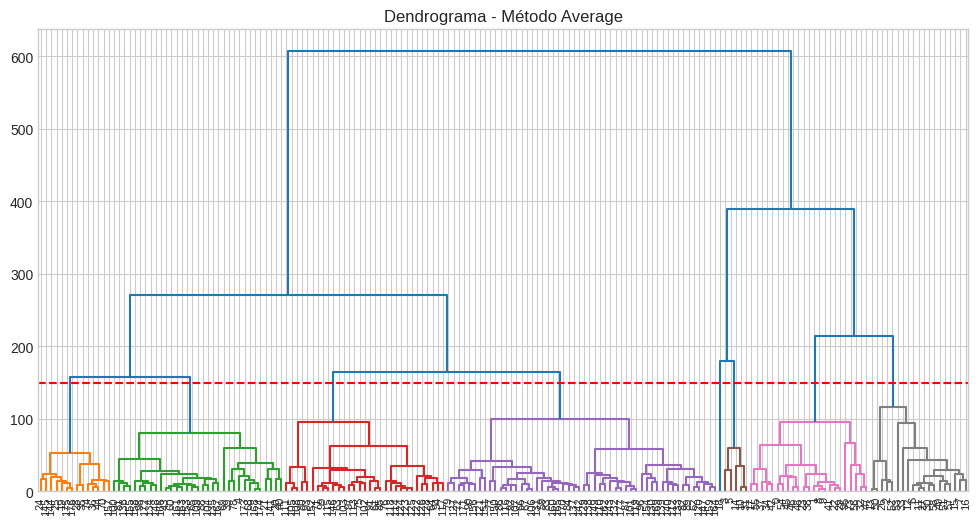

In [8]:
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=30, leaf_rotation=90, leaf_font_size=8, color_threshold=150)
plt.axhline(y=150, color='r', linestyle='--')  # Linha de corte ajustável
plt.title(f"Dendrograma - Método {linkage_method.capitalize()}")
plt.show()

In [9]:
for k in [2, 3, 4, 5]:
    clusters = fcluster(Z, k, criterion="maxclust")
    print(f"\nNúmero de clusters: {k}")
    print(pd.Series(clusters).value_counts())


Número de clusters: 2
1    130
2     48
Name: count, dtype: int64

Número de clusters: 3
1    130
3     42
2      6
Name: count, dtype: int64

Número de clusters: 4
2    83
1    47
4    42
3     6
Name: count, dtype: int64

Número de clusters: 5
2    83
1    47
4    23
5    19
3     6
Name: count, dtype: int64


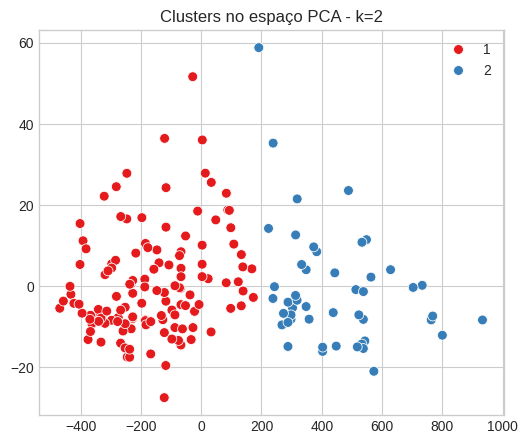

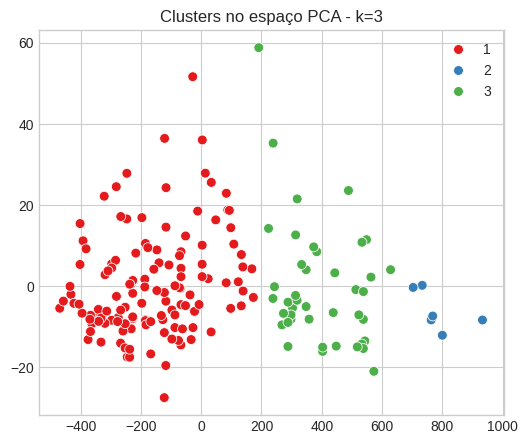

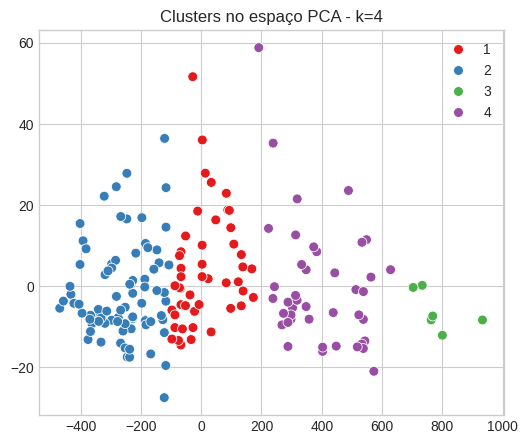

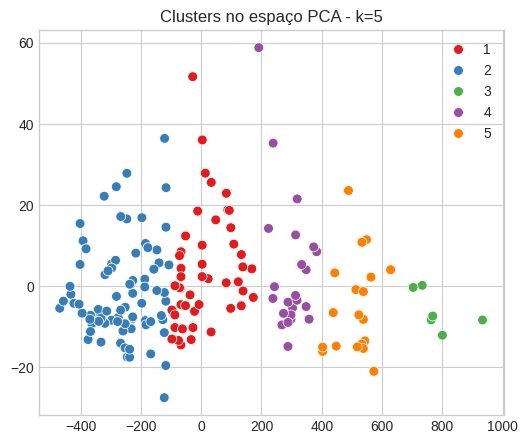

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

for k in [2, 3, 4, 5]:
    clusters = fcluster(Z, k, criterion="maxclust")

    plt.figure(figsize=(6,5))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set1", s=50)
    plt.title(f"Clusters no espaço PCA - k={k}")
    plt.show()


A escolha de 4 clusters é justificada pelo dendrograma do método average linkage, que mostra uma fusão natural em quatro grupos antes que a distância entre clusters aumente significativamente. Além disso, ao visualizar o scatter plot das features alcohol e flavanoids, nota-se que os quatro clusters apresentam uma separação clara e bem definida, com cada grupo mostrando padrões distintos de variação química, capturando nuances que não seriam percebidas se limitássemos a 3 clusters